### PTID-CDS-JAN22-1274

###  Flight price prediction(PRCP 1025)

### Variables

Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person traveled

Source: Starting location of flight

Destination: Ending location of flight

Route: This contains information on starting and ending location of the journey in the standard format used by airlines.

Dep_Time: Departure time of flight from starting location

Arrival_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.

Additional_Info: Shown any additional information about a flight

Price: Price of the flight

In [1]:
#libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### importing the dataset

In [3]:
df=pd.read_csv("Flight_Fare.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
count_nan=df.isnull().sum()
print(count_nan[count_nan>0])     

Route          1
Total_Stops    1
dtype: int64


In [6]:
(df.isnull().sum()/df.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [7]:
df.dropna(inplace= True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### EDA

### 
We can extract ‘Journey_day’ and ‘Journey_Month’ from the ‘Date_of_Journey’ variable. ‘Journey day’ shows the day of the month on which the journey was started.

In [8]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

### 
Similarly, we can extract ‘Departure_Hour’ and ‘Departure_Minute’ as well as ‘Arrival_Hour and ‘Arrival_Minute’ from ‘Dep_Time’ and ‘Arrival_Time’ variables respectively.

In [9]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [10]:
df["Arr_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### 
We also have duration information on the ‘Duration’ variable. This variable contains both duration hours and minutes information combined.We can extract ‘Duration_hours’ and ‘Duration_minutes’ separately from the ‘Duration’ variable. 

In [13]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                  #check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"      # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]              # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))              #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   #Extracts only minutes from duration

In [14]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1 , inplace=True)

### 
Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data. Let’s handle each one by one.

Airline Variable

Let’s see how the Airline variable is related to the Price variable.

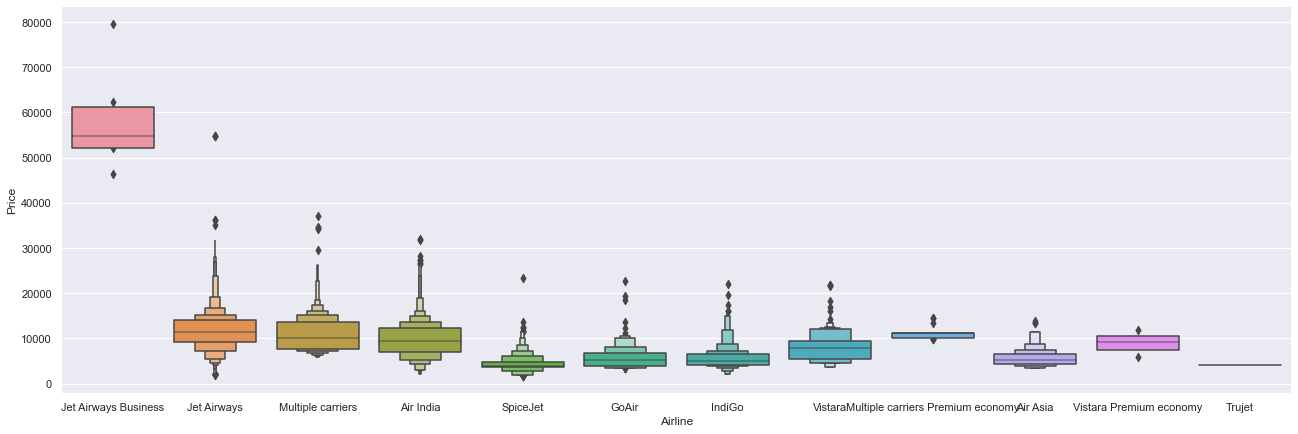

In [15]:
sns.set()
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### 
 ‘JetAirways Business’ has the highest price range. Other airlines price also varies.

### 
Since the Airline variable is Nominal Categorical Data (There is no order of any kind in airline names) we will use one-hot encoding to handle this variable.



In [16]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


###  
Source  and Destination Variable

‘Source’ and ‘Destination’ variables are Nominal Categorical Data. We will use One-Hot encoding again to handle these two variables.

In [17]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [18]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### 
Route variable

Route variable represents the path of the journey. Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected so I have decided to drop this variable.

In [19]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [20]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
#We can see it is an Ordinal Categorical Data so we will use LabelEncoder here to handle this variable.

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [22]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### Final Dataframe
Now we will create the final dataframe by concatenating all the One-hot and Label-encoded features to the original dataframe.

In [23]:
dataframe = pd.concat([df, Airline, Source, Destination], axis = 1)
dataframe.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [24]:
dataframe.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


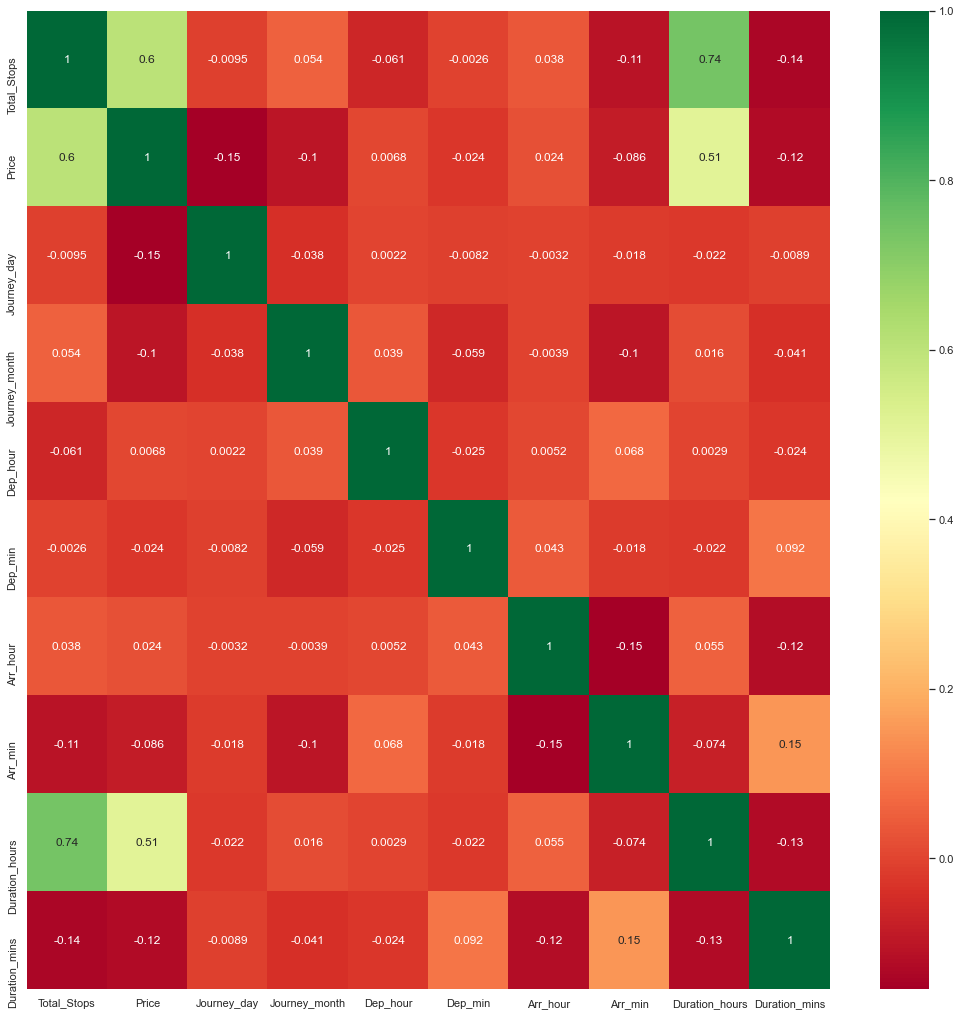

In [25]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Model Building

In [26]:
x=dataframe.drop('Price',axis=1)
y=dataframe['Price']
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)



Lazy Prediction is a machine learning library available in python that can quickly provide us with performances of multiple standard classifications or regression models on multiple performance matrices.

In [24]:
!pip install lazypredict

In [25]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models.head(10)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:42<00:00,  2.43s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.84,0.85,1820.25,1.15
LGBMRegressor,0.82,0.83,1937.88,0.29
HistGradientBoostingRegressor,0.82,0.83,1939.34,2.21
ExtraTreesRegressor,0.80,0.80,2056.74,5.05
RandomForestRegressor,0.79,0.80,2090.02,6.03
KNeighborsRegressor,0.79,0.79,2115.92,2.17
BaggingRegressor,0.79,0.79,2122.90,0.68
GradientBoostingRegressor,0.78,0.79,2149.97,2.00
DecisionTreeRegressor,0.72,0.72,2445.94,0.31


### 
Here ‘XGBRegressor’ outperform other models significantly. It does take a high amount of training time with respect to other models.

We will train ‘XGBRegressor and visualize the final results.

### Model Training

In [26]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_pred =  model.predict(x_test)
print('Training Score :',model.score(x_train, y_train))
print('Test Score     :',model.score(x_test, y_test))

Training Score : 0.9353790824718483
Test Score     : 0.846332117966892


In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1135.7739130429816
MSE: 3313395.5276125227
RMSE: 1820.273476050377


In [30]:
metrics.r2_score(y_test, y_pred)

0.846332117966892

### fitting model using random forest

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = reg.predict(x_test)

In [41]:
reg.score(x_train, y_train)

0.9532227605587874

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1178.6889288096218
MSE: 4384946.364004373
RMSE: 2094.026352270757


In [44]:
metrics.r2_score(y_test, y_pred)

0.7966359841528317

### Hyperparameter tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=52, n_jobs = 1)

In [74]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   4.6s
[CV] n_estimators=800, min_samples_split=2, min_sa

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=52, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [76]:
prediction = rf_random.predict(x_test)

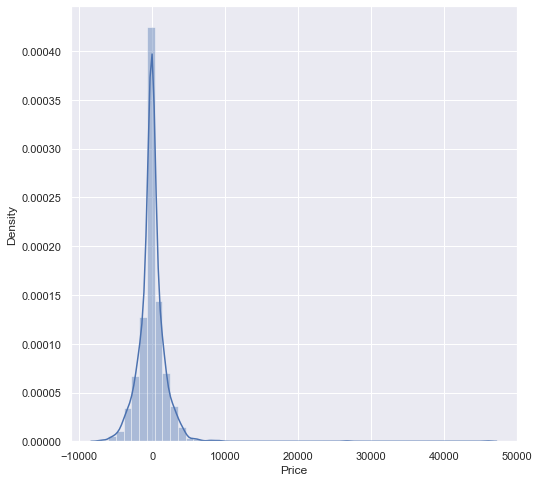

In [77]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

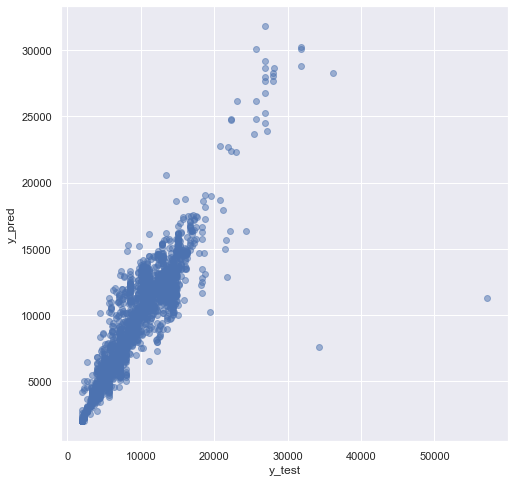

In [78]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1141.9411350889764
MSE: 4076019.363109753
RMSE: 2018.9153927566535


In [80]:
metrics.r2_score(y_test,prediction)

0.8109633282729956

### Conclusion

The r2_score received for XGBRegressor comes out to be better after hypertuning, which is 84%, as compared to Random Forest Regressor giving accuracy as 79.66%. 
Hence we select XGBRegressor as our final model.

we are successfully able to train our regression model ‘XGBRegressor’ to predict the flights of prices with an r2_score of 84%, and have achieved the required task successfully.

Model          : XGBRegressor

Training Score : 0.9353790824718483

Test Score     : 0.846332117966892

MAE            : 1135.7739130429816

MSE            : 3313395.5276125227

RMSE           : 1820.273476050377

R2 score       : 0.846332117966892

In this article, we saw how to apply Lazy Prediction library to choose the best machine learning algorithm for the task at hand.

Lazy Prediction saves time and efforts to build a machine learning model by providing model performance and training time. One can choose either based on the situation at hand.

